Accuracy: 1.00
Розподіл міток:
1    47
0     4
Name: label, dtype: int64


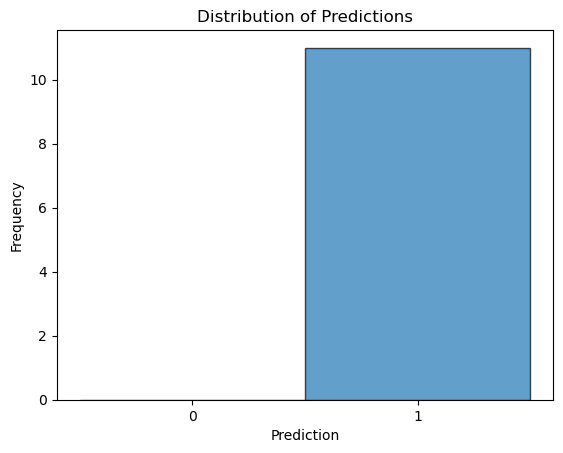


🔝 Топ-20 найпопулярніших слів у відгуках:
            word  count
8      apartment     33
23            br     25
46          cozy     17
34         clean     16
132         nice     14
77         great     14
152        place     12
129         need     12
204         stay     11
212        thank     10
127       nearby     10
110        liked      9
114     location      9
37   comfortable      8
93         hosts      7
187        shops      7
195        small      7
76          good      7
44    convenient      6
168       really      6


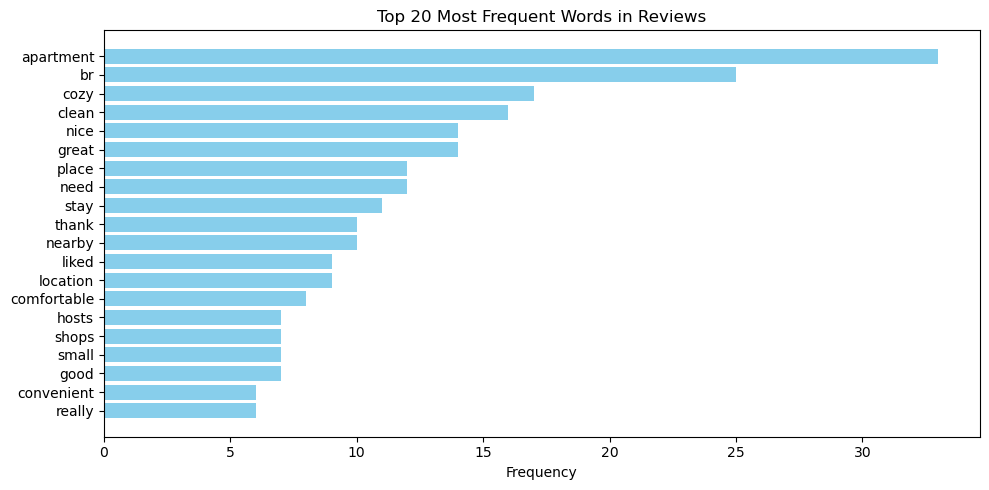

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('Airbnb_Merged_file.csv')

# Вибір потрібних стовпців
data = data[['Localized Content', 'Rating']]

# Перетворення Rating на числовий тип
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Видалення пропусків
data = data.dropna()

# Створення бінарної мітки: 1 = позитивний відгук (рейтинг ≥ 4), 0 = негативний
data['label'] = data['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Перетворення тексту в нижній регістр
data['cleaned_text'] = data['Localized Content'].apply(lambda x: x.lower())

# Розділення даних
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'], data['label'], test_size=0.2, random_state=42
)

# Векторизація тексту
vectorizer = CountVectorizer(stop_words='english')  # ігноруємо стоп-слова
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Навчання моделі
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Прогнозування
predictions = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Розподіл міток
print("Розподіл міток:")
print(data['label'].value_counts())

# Візуалізація результатів
plt.hist(predictions, bins=np.arange(-0.5, 2, 1), alpha=0.7, edgecolor='black')
plt.title('Distribution of Predictions')
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.show()

# 🔍 Аналіз найпопулярніших слів
word_counts = np.asarray(X_train_vec.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()
word_freq = pd.DataFrame({'word': vocab, 'count': word_counts})
top_words = word_freq.sort_values(by='count', ascending=False).head(20)

print("\n🔝 Топ-20 найпопулярніших слів у відгуках:")
print(top_words)

# Візуалізація популярних слів
plt.figure(figsize=(10,5))
plt.barh(top_words['word'][::-1], top_words['count'][::-1], color='skyblue')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()